In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

In [3]:
import os 
os.getcwd()

'/Users/pulkit'

In [5]:
os.chdir('/Users/pulkit/Desktop/python/timeseries')

In [216]:
train= pd.read_csv("train1.csv")


In [166]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [167]:
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [168]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [219]:
train= train.drop('ID', 1)

In [220]:
train['Datetime']= pd.to_datetime(train['Datetime'], format= "%d-%m-%Y %H:%M")

In [221]:
train.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [172]:
train['year']= train.Datetime.dt.year
train['month']= train.Datetime.dt.month
train['day']= train.Datetime.dt.day
train['hour']= train.Datetime.dt.hour

In [173]:
train.head()

,Datetime,Count,year,month,day,hour
0,2012-08-25 00:00:00,8,2012,8,25,0
1,2012-08-25 01:00:00,2,2012,8,25,1
2,2012-08-25 02:00:00,6,2012,8,25,2
3,2012-08-25 03:00:00,2,2012,8,25,3
4,2012-08-25 04:00:00,2,2012,8,25,4


In [231]:
train.index= train['Datetime']
train= train.drop('Datetime', 1)

In [175]:
train.head()

,Count,year,month,day,hour
Datetime,,,,,
2012-08-25 00:00:00,8,2012,8,25,0
2012-08-25 01:00:00,2,2012,8,25,1
2012-08-25 02:00:00,6,2012,8,25,2
2012-08-25 03:00:00,2,2012,8,25,3
2012-08-25 04:00:00,2,2012,8,25,4


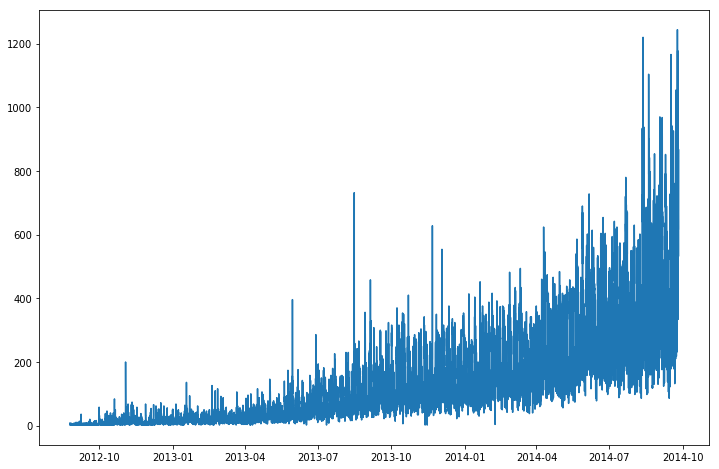

In [176]:
plt.figure(figsize= (12,8))
plt.plot(train['Count'])
plt.show()

In [177]:
#testing if the time series is stationary or not 
#Dickey-Fuller Test

In [178]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
  
    rolmean= timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #ploting graphs
    plt.figure(figsize= (15,8))
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolmean, color= 'red', label= 'mean')
    plt.plot(rolstd, color= 'black', label= 'Standard Deviation')
    plt.legend()
    plt.show()
    
    print('result of dickey fuller test:')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index= ['Test Statistics', 'p-value', '#lags used', 'Number of observation used'])   
    for key, value in dftest[4].items():
         dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

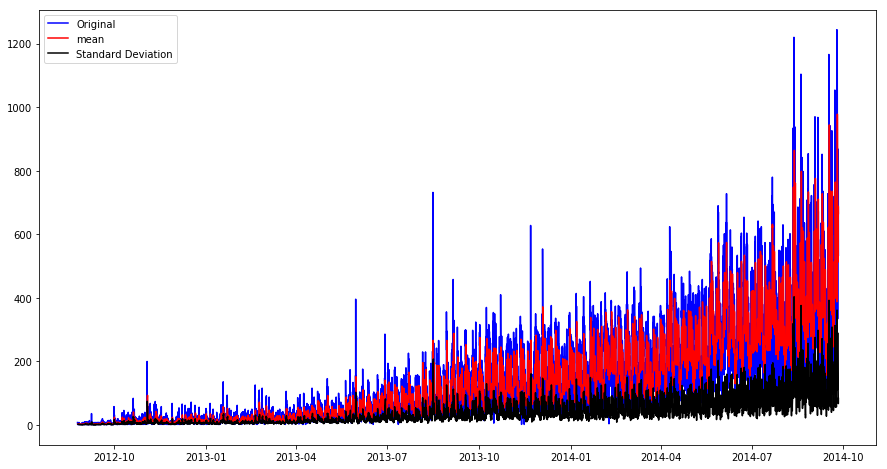

result of dickey fuller test:
Test Statistics                  -4.456561
p-value                           0.000235
#lags used                       45.000000
Number of observation used    18242.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861698
Critical Value (10%)             -2.566854
dtype: float64


In [179]:
test_stationary(train['Count'])

In [ ]:
#if a TS is non stationary, we can start with log_transformation
#if it does not work, we can then
#1. Aggregate (taking average for a time period like monthly/weekly averages)
#2. Smoothing – taking rolling averages
#3. Polynomial Fitting – fit a regression model

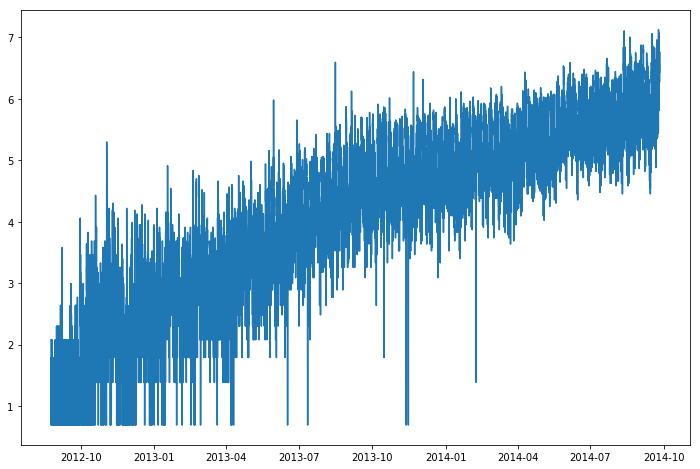

In [198]:
train_log= np.log(train['Count'])
plt.figure(figsize= (12,8))
plt.plot(train_log)
plt.show()

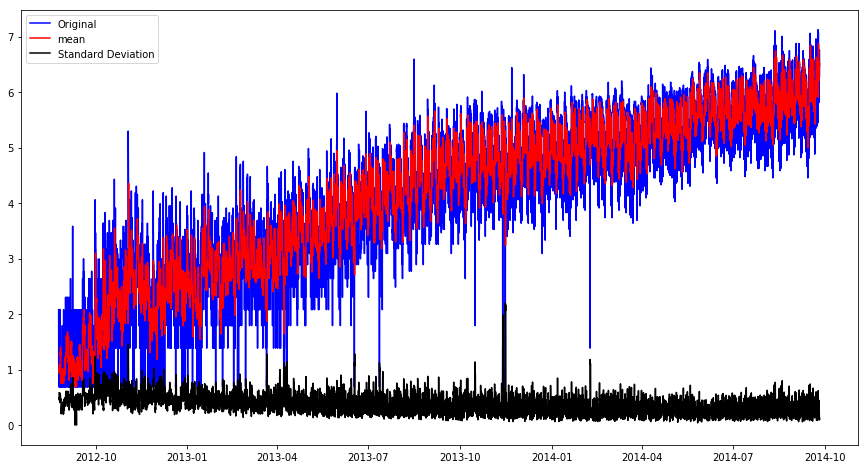

result of dickey fuller test:
Test Statistics                  -3.211373
p-value                           0.019336
#lags used                       45.000000
Number of observation used    18242.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861698
Critical Value (10%)             -2.566854
dtype: float64


In [199]:
test_stationary(train_log)

In [ ]:
#aggregating the data set day wise because there is so much noise. 

In [150]:
train_avg= train.resample('D').mean()

In [151]:
train_avg.head()

,Count,year,month,day,hour
Datetime,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5
2012-08-26,3.666667,2012.0,8.0,26.0,11.5
2012-08-27,2.583333,2012.0,8.0,27.0,11.5
2012-08-28,2.416667,2012.0,8.0,28.0,11.5
2012-08-29,2.500000,2012.0,8.0,29.0,11.5


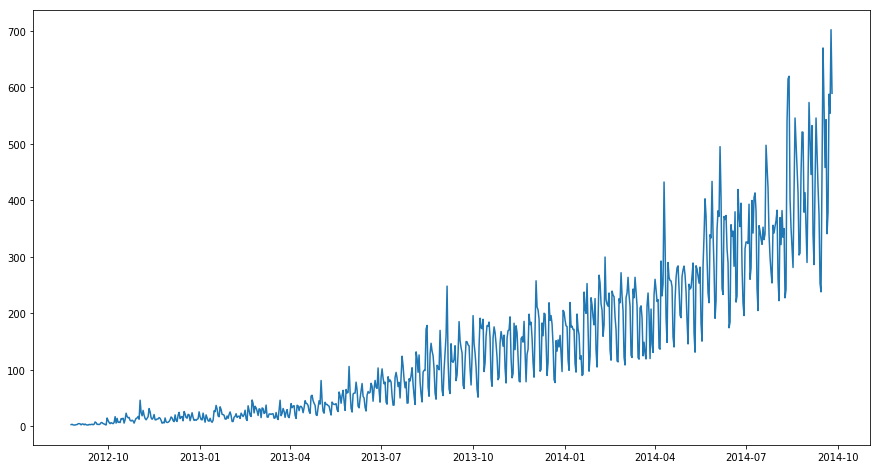

In [152]:
plt.figure(figsize= (15,8))
plt.plot(train_avg['Count'])
plt.show()

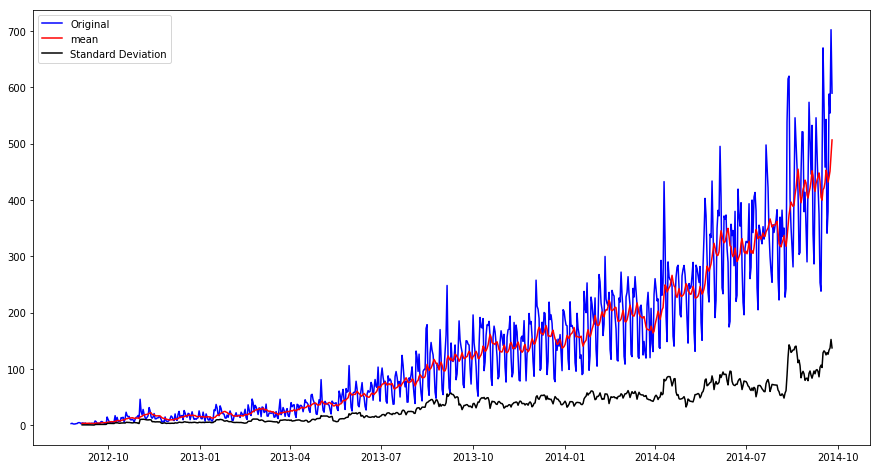

result of dickey fuller test:
Test Statistics                 2.986351
p-value                         1.000000
#lags used                     20.000000
Number of observation used    741.000000
Critical Value (1%)            -3.439206
Critical Value (5%)            -2.865448
Critical Value (10%)           -2.568851
dtype: float64


In [180]:
test_stationary(train_avg['Count'])

In [ ]:
#Smoothing

In [185]:
train_moving_avg= train['Count'].rolling(12).mean()


In [187]:
train_moving_avg.head(12)

Datetime
2012-08-25 00:00:00    NaN
2012-08-25 01:00:00    NaN
2012-08-25 02:00:00    NaN
2012-08-25 03:00:00    NaN
2012-08-25 04:00:00    NaN
2012-08-25 05:00:00    NaN
2012-08-25 06:00:00    NaN
2012-08-25 07:00:00    NaN
2012-08-25 08:00:00    NaN
2012-08-25 09:00:00    NaN
2012-08-25 10:00:00    NaN
2012-08-25 11:00:00    3.5
Name: Count, dtype: float64

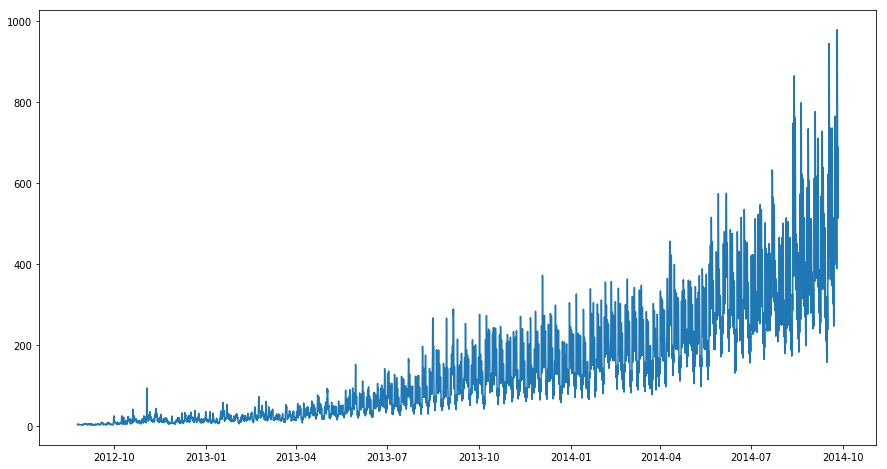

In [190]:
train_moving_avg.dropna(inplace=True)
plt.figure(figsize= (15,8))
plt.plot(train_moving_avg)
plt.show()


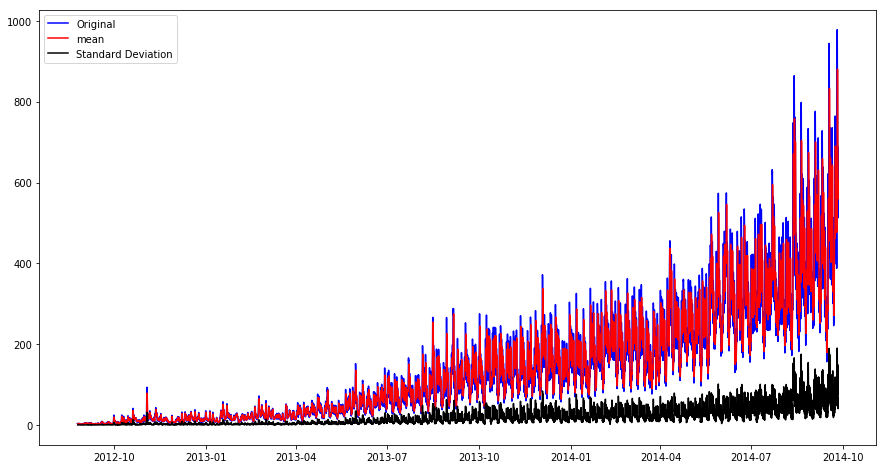

result of dickey fuller test:
Test Statistics                  -4.672051
p-value                           0.000095
#lags used                       45.000000
Number of observation used    18231.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861699
Critical Value (10%)             -2.566854
dtype: float64


In [191]:
test_stationary(train_moving_avg)

In [193]:
# The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality.
# Lets discuss two ways of removing trend and seasonality:

# Differencing – taking the differece with a particular time lag
# Decomposition – modeling both trend and seasonality and removing them from the model.

In [195]:
#differencing 
# here since there is so much noise in train we are using train_avg for differencing

In [205]:
train_diff= train_avg['Count']- train_avg['Count'].shift(1)

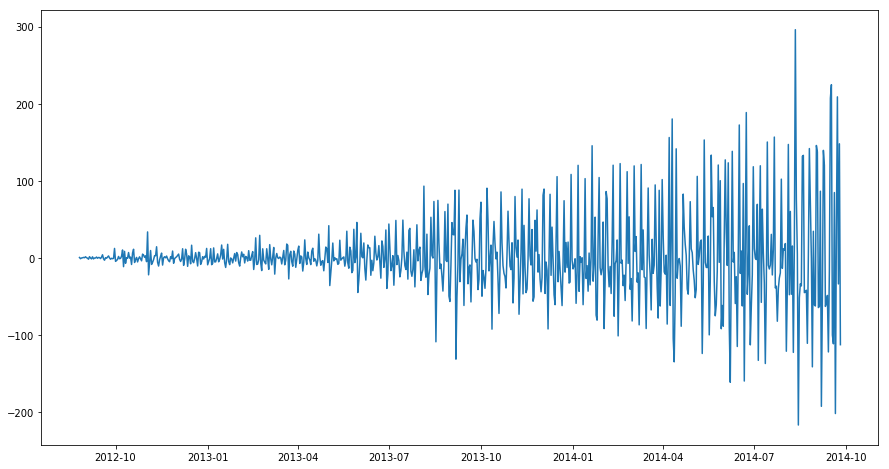

In [206]:
train_diff.dropna(inplace=True)
plt.figure(figsize= (15,8))
plt.plot(train_diff)
plt.show()

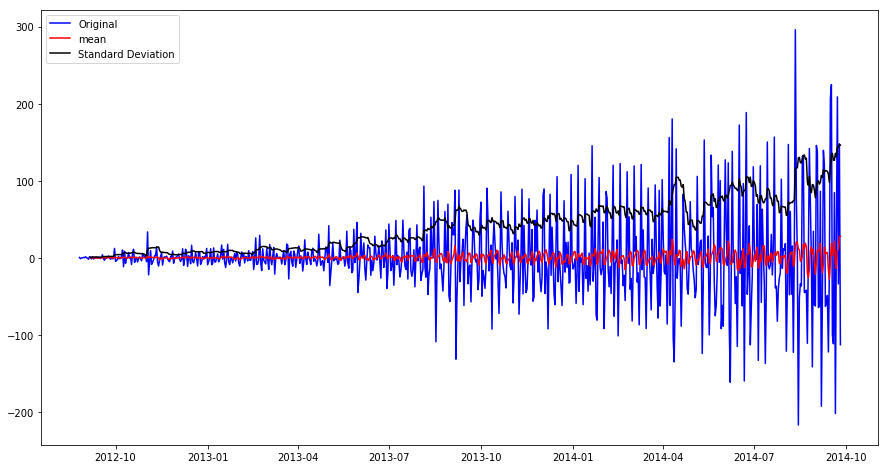

result of dickey fuller test:
Test Statistics              -7.964456e+00
p-value                       2.889911e-12
#lags used                    2.000000e+01
Number of observation used    7.400000e+02
Critical Value (1%)          -3.439218e+00
Critical Value (5%)          -2.865454e+00
Critical Value (10%)         -2.568854e+00
dtype: float64


In [207]:
test_stationary(train_diff)

In [208]:
#Decomposing
#In this approach, both trend and seasonality are modeled separately 
#and the remaining part of the series is returned.
#and we can model the residuals.

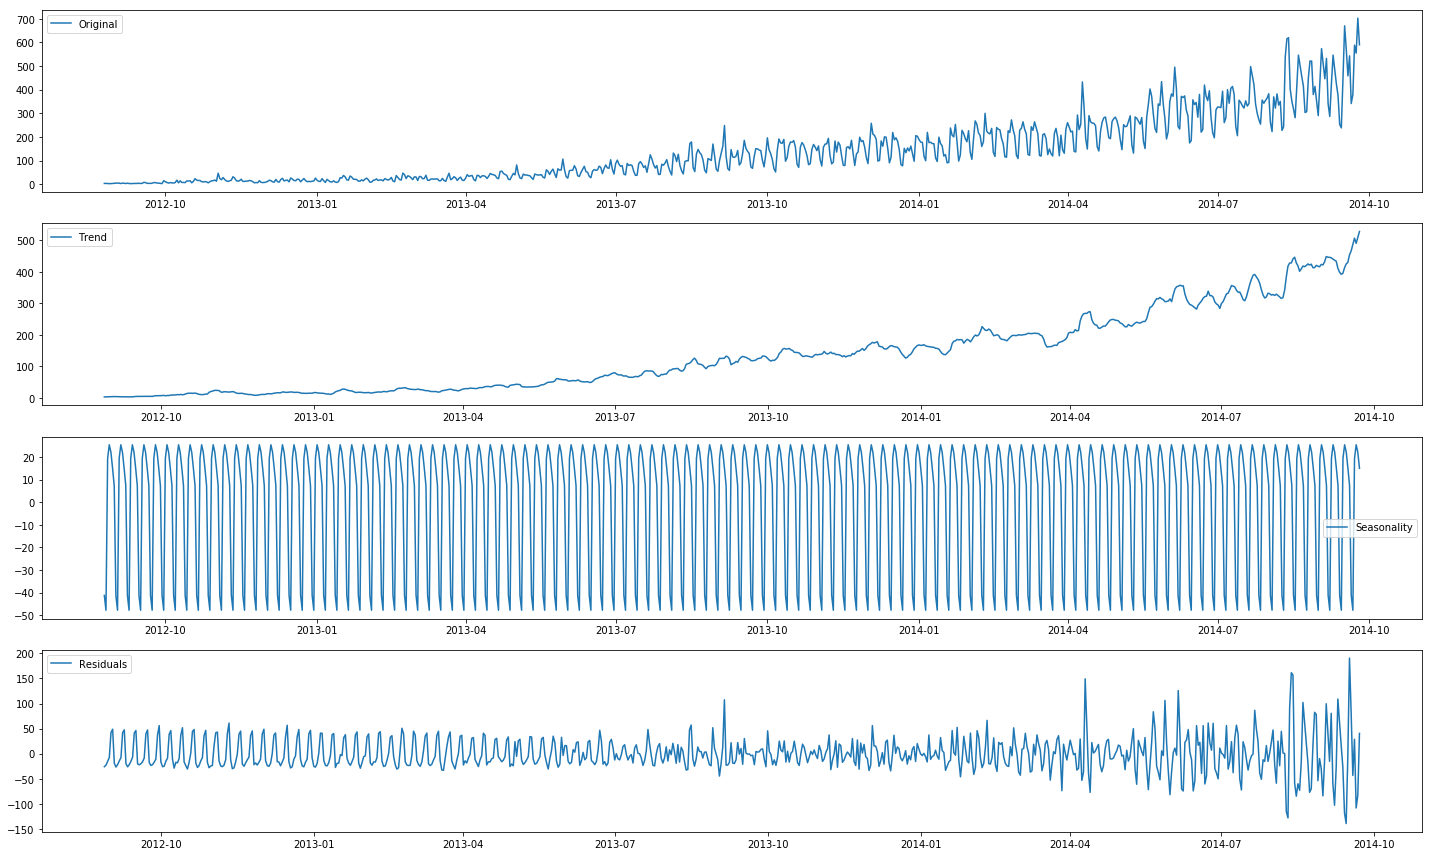

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_avg['Count'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(train_avg['Count'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

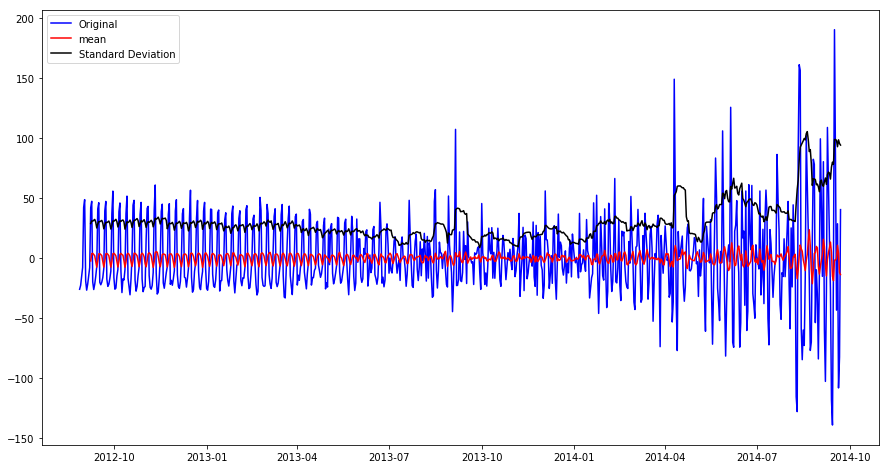

result of dickey fuller test:
Test Statistics              -1.276858e+01
p-value                       7.860026e-24
#lags used                    1.900000e+01
Number of observation used    7.360000e+02
Critical Value (1%)          -3.439266e+00
Critical Value (5%)          -2.865475e+00
Critical Value (10%)         -2.568865e+00
dtype: float64


In [214]:
residual.dropna(inplace=True)
test_stationary(residual)

In [ ]:
#Splitting Data set 

In [233]:
train_new= train[0:10392]
test= train[10392:11856]

In [234]:
train_new.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [235]:
test.head()

,Count
Datetime,
2013-11-01 00:00:00,170
2013-11-01 01:00:00,156
2013-11-01 02:00:00,90
2013-11-01 03:00:00,88
2013-11-01 04:00:00,54


In [ ]:
# Forecasting a Time Series
# Method 1 – Start with a Naive Approach
# Method 2 – Simple average
# Method 3 – Moving average
# Method 4 – Single Exponential smoothing
# Method 5 – Holt’s linear trend method
# Method 6 – Holt’s Winter seasonal method
# Method 7 – ARIMA

In [215]:
#agreegating the data on daily basis 

In [237]:
train_new= train_new.resample("D").mean()
test= test.resample("D").mean()

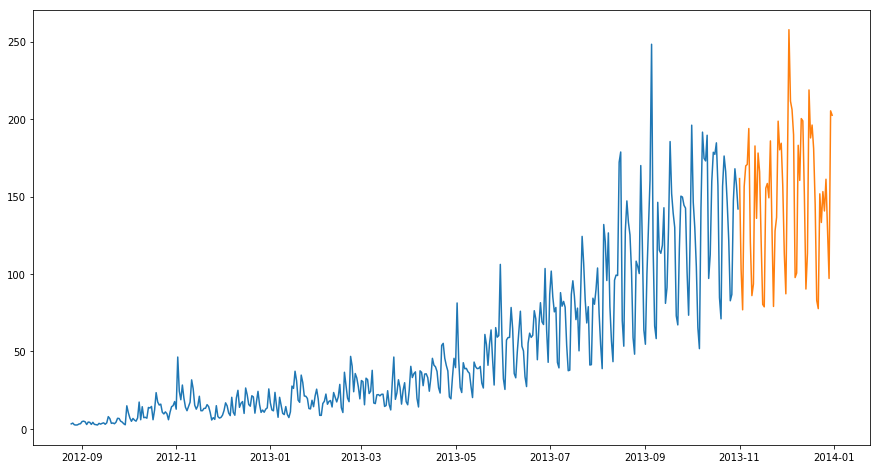

In [242]:
plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.show()

In [ ]:
#Naive Approach

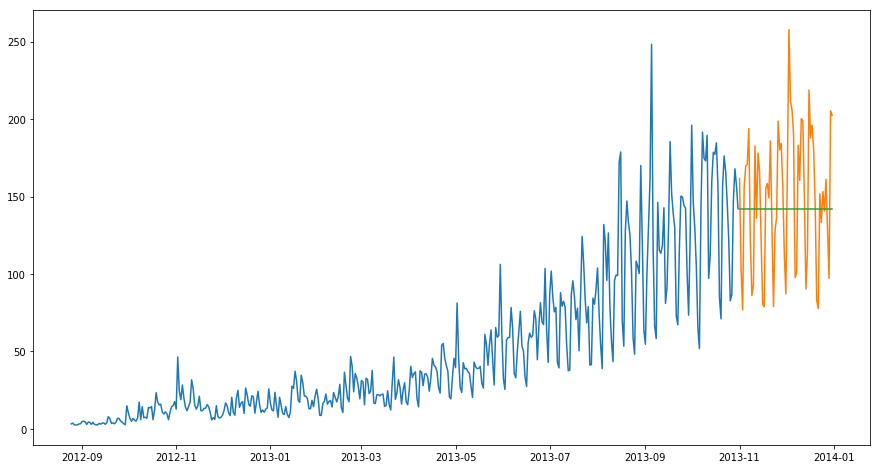

In [255]:
dd= np.asarray(train_new.Count)

y_pred= test.copy()

y_pred["Naive"]= dd[len(dd)-1]

plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['Naive'])
plt.show()


In [ ]:
#simple average 

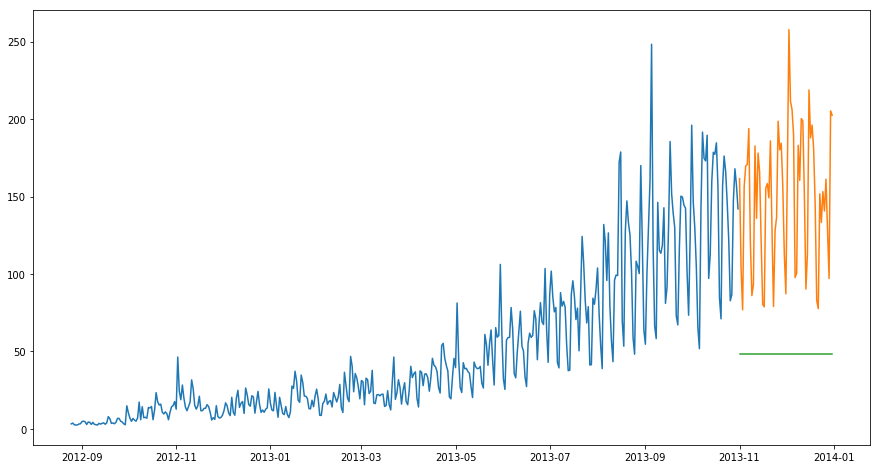

In [257]:
dd= np.asarray(train_new.Count)

y_pred= test.copy()

y_pred["avg"]= train_new['Count'].mean()

plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['avg'])
plt.show()


In [ ]:
Moving average

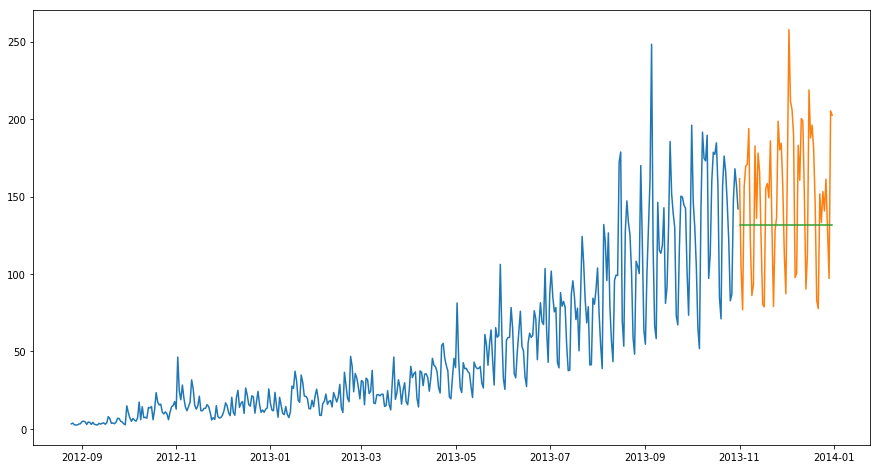

In [264]:
dd= np.asarray(train_new.Count)

y_pred= test.copy()

y_pred["moving_avg"]= train_new['Count'].rolling(60).mean().iloc[-1]


plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['moving_avg'])
plt.show()


In [265]:
#Exponential Smoothing 

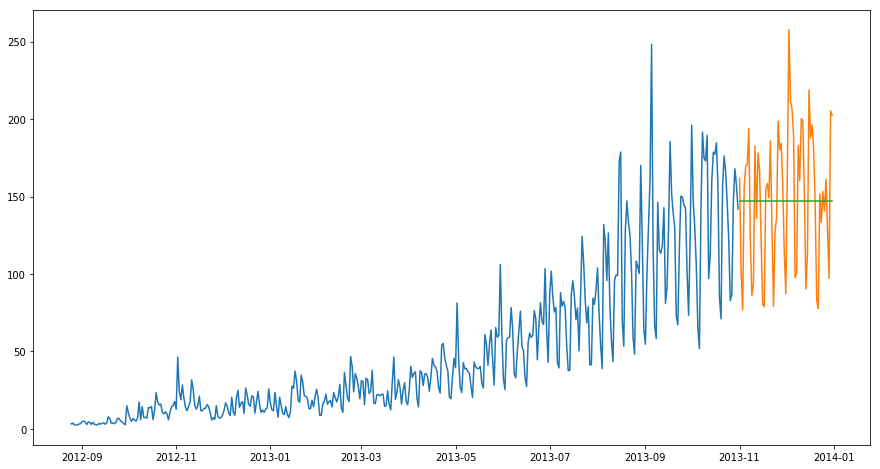

In [266]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

y_pred= test.copy()

fit=  SimpleExpSmoothing(train_new).fit(smoothing_level=0.6, 
                                        optimized=False)
y_pred['SES']= fit.forecast(len(test))

plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['SES'])
plt.show()


In [270]:
import math
from sklearn.metrics import mean_squared_error

rms= math.sqrt(mean_squared_error(test['Count'], y_pred['SES']))
print(rms)

43.357625225228155


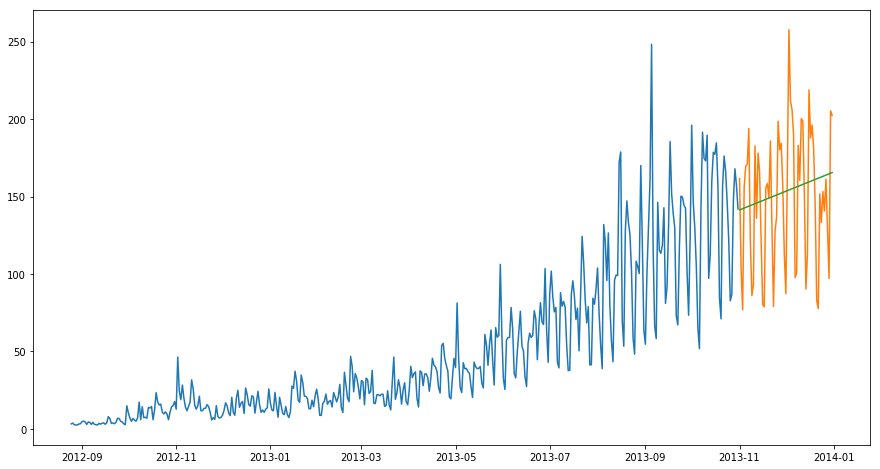

In [273]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

y_pred= test.copy()

fit=  Holt(train_new).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_pred['Holt_linear']= fit.forecast(len(test))

plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['Holt_linear'])
plt.show()


In [274]:
import math
from sklearn.metrics import mean_squared_error

rms= math.sqrt(mean_squared_error(test['Count'], y_pred['Holt_linear']))
print(rms)

43.056259611507286


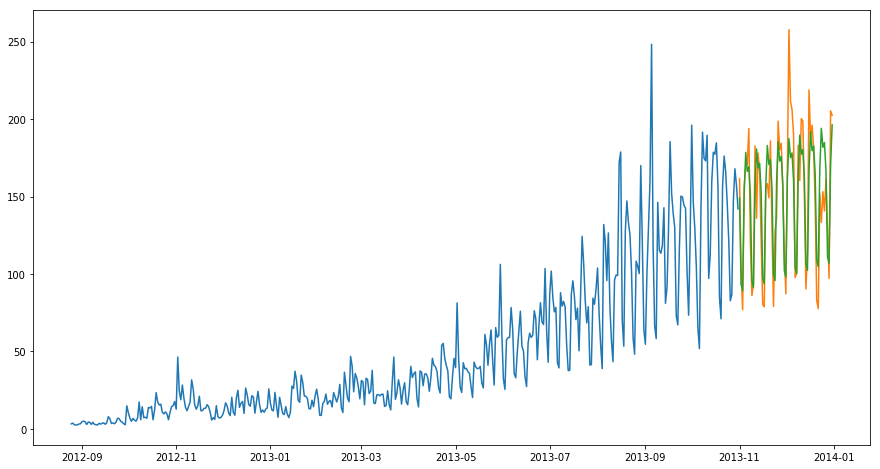

In [277]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

y_pred= test.copy()

fit1 = ExponentialSmoothing(train_new['Count'],seasonal_periods=7, trend='add',seasonal='add').fit()
y_pred['Holt_winter']= fit1.forecast(len(test))

plt.figure(figsize= (15,8))
plt.plot(train_new)
plt.plot(test)
plt.plot(y_pred['Holt_winter'])
plt.show()


In [278]:
# Arima model which takes into consideration the auto correlation 
#between data points 

In [309]:
# seasonal Arima

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


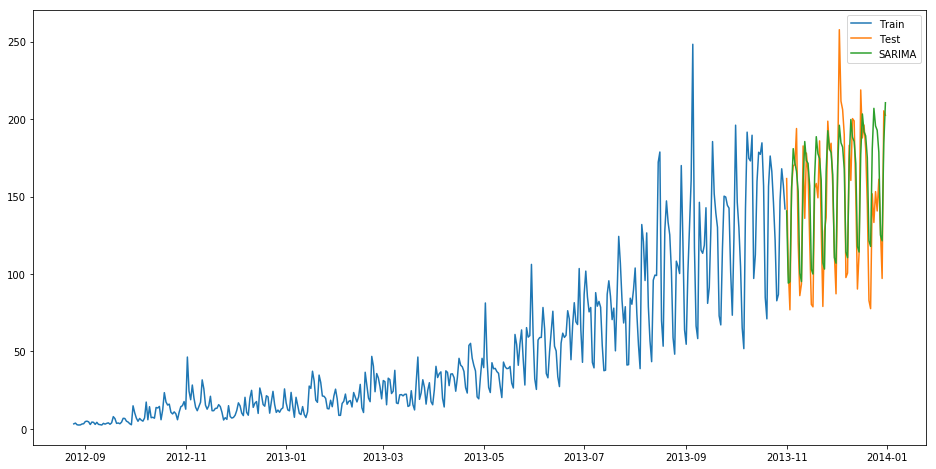

In [308]:
y_pred = test.copy()

import statsmodels.api as sm 

fit1 = sm.tsa.statespace.SARIMAX(train_new.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_pred['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_new['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_pred['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [279]:
# there are three parameters in ARIMA model which is found using:
#1. Autocorrelation function 
#2. Partial Autocorrelation Function

Text(0.5, 1.0, 'Partial Autocorrelation Function')

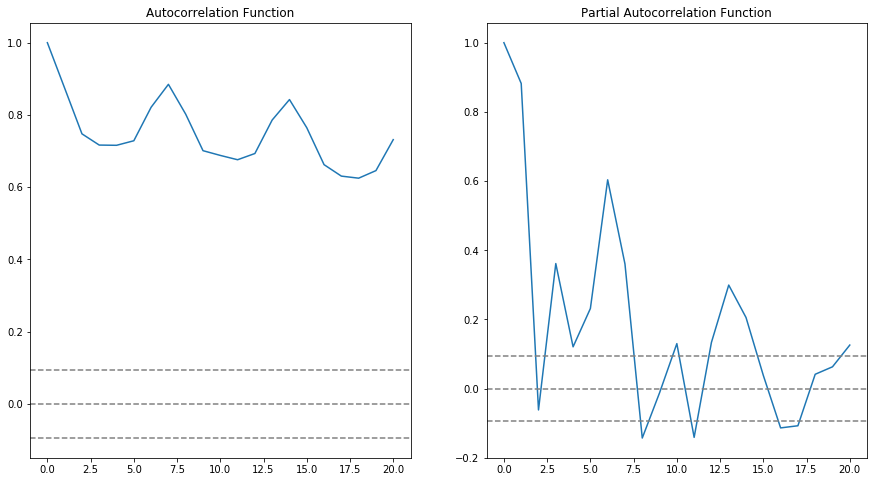

In [294]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf= acf(train_new, nlags=20)
lag_pacf = pacf(train_new, nlags=20, method='ols')

plt.figure(figsize=(15,8))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_new)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_new)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [291]:
train_new_diff= train_new- train_new.shift(1)
train_new_diff.dropna(inplace=True)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

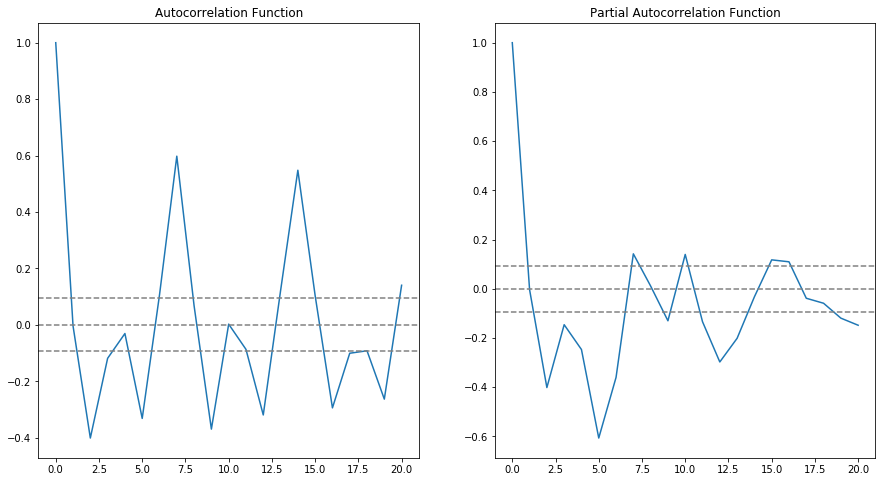

In [293]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf= acf(train_new_diff, nlags=20)
lag_pacf = pacf(train_new_diff, nlags=20, method='ols')

plt.figure(figsize=(15,8))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_new_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_new_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_new_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_new_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [295]:
# p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
# q – The lag value where the ACF chart crosses the upper confidence interval for the first time.

In [298]:
p= 1
d= 1   #number of differences
q= 1

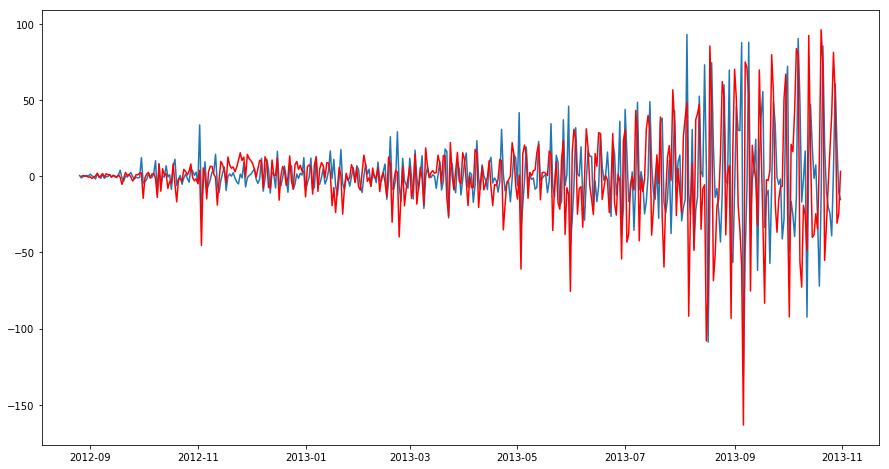

In [304]:
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(train_new_diff, order=(2,1,2))
result= model.fit()

plt.figure(figsize=(15,8))
plt.plot(train_new_diff)
plt.plot(result.fittedvalues, color='red')